In [7]:
import os
from glob import glob

import xarray as xr
import dask
import cftime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import util

PROJECT = "NCGD0011"
USER = os.environ["USER"]

In [47]:
var_ctrl = "DIC"
var_test = "DIC_ALT_CO2"

In [48]:
fpath_smyle = '/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/SMYLE-FOSI/ocn/proc/tseries/month_1/'
ds_ctrl = xr.open_dataset(
    f'{fpath_smyle}/g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005.pop.h.{var_ctrl}.030601-036812.nc', 
    decode_times=False,
)

tb_var = ds_ctrl.time.attrs["bounds"]
time_units = ds_ctrl.time.units
calendar = ds_ctrl.time.calendar

time = cftime.num2date(
    ds_ctrl[tb_var].mean('d2'),
    units=time_units,
    calendar=calendar,
)
yyyymm_ctrl = np.array([f'{t.year:04d}-{t.month:02d}' for t in time]) #.sel(timestamps)
tndx = np.arange(
    np.where(yyyymm_ctrl == "0347-01")[0],
    np.where(yyyymm_ctrl == "0356-12")[0] + 1, 1,
)

yyyymm_ctrl = yyyymm_ctrl[tndx]

ds_ctrl = ds_ctrl.isel(z_t=0, time=tndx)
ds_ctrl

/glade/derecho/scratch/mclong/tmp/ipykernel_57909/730155827.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tndx = np.arange(


<xarray.Dataset> Size: 80MB
Dimensions:                 (moc_comp: 3, transport_comp: 5, transport_reg: 2,
                             z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60,
                             lat_aux_grid: 395, moc_z: 61, nlat: 384,
                             nlon: 320, time: 120, d2: 2)
Coordinates:
    z_t                     float32 4B 500.0
  * z_t_150m                (z_t_150m) float32 60B 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 240B 1e+03 2e+03 ... 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 2kB -79.49 -78.95 ... 90.0
  * moc_z                   (moc_z) float32 244B 0.0 1e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 983kB ...
    ULAT                    (nlat, nlon) float64 983kB ...
    TLONG                   (nlat, nlon) float64 983kB ...
    TLAT                    (nlat, nlon) float64 983kB ...
  * time                    (time) float64 960B 1.267e+05 ... 1.303e+05
Dimensions without coordinates: moc_comp, transport_comp, transport_reg, nlat,
                                nlon, d2
Data variables: (12/55)
    moc_components          (moc_comp) |S384 1kB ...
    transport_components    (transport_comp) |S384 2kB ...
    transport_regions       (transport_reg) |S384 768B ...
    dz                      float32 4B ...
    dzw                     (z_w) float32 240B ...
    KMT                     (nlat, nlon) float64 983kB ...
    ...                      ...
    salinity_factor         float64 8B ...
    sflux_factor            float64 8B ...
    nsurface_t              float64 8B ...
    nsurface_u              float64 8B ...
    time_bound              (time, d2) float64 2kB 1.267e+05 ... 1.303e+05
    DIC                     (time, nlat, nlon) float32 59MB ...
Attributes:
    title:             g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005
    history:           Fri Jan 28 17:08:55 2022: ncrcat g.e22.GOMIPECOIAF_JRA...
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2020-11-04 at 21:41:45.3
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....

In [49]:
%%time
path = "/glade/derecho/scratch/mclong/archive/smyle-fosi.derecho.test.alk-forcing-lat-range-basin.000/ocn/hist"
case = "smyle-fosi.derecho.test.alk-forcing-lat-range-basin.000"
stream = "pop.h"

files = sorted(glob(f"{path}/{case}.{stream}.[0-9][0-9][0-9][0-9]-[0-9][0-9].nc"))

ds = xr.open_mfdataset(
    files, 
    decode_times=False, 
    coords="minimal", 
    join="override").isel(z_t=0)
ds

CPU times: user 1min 13s, sys: 1.2 s, total: 1min 15s
Wall time: 1min 17s


<xarray.Dataset> Size: 167GB
Dimensions:                          (time: 120, d2: 2, moc_comp: 3,
                                      transport_comp: 5, transport_reg: 2,
                                      z_t_150m: 15, z_w: 60, z_w_top: 60,
                                      z_w_bot: 60, lat_aux_grid: 395,
                                      moc_z: 61, nlat: 384, nlon: 320)
Coordinates: (12/15)
    moc_components                   (moc_comp) |S384 1kB dask.array<chunksize=(3,), meta=np.ndarray>
    transport_components             (transport_comp) |S384 2kB dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions                (transport_reg) |S384 768B dask.array<chunksize=(2,), meta=np.ndarray>
  * time                             (time) float64 960B 1.267e+05 ... 1.303e+05
    z_t                              float32 4B 500.0
  * z_t_150m                         (z_t_150m) float32 60B 500.0 ... 1.45e+04
    ...                               ...
  * lat_aux_grid                     (lat_aux_grid) float32 2kB -79.49 ... 90.0
  * moc_z                            (moc_z) float32 244B 0.0 1e+03 ... 5.5e+05
    ULONG                            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                             (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                             (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, moc_comp, transport_comp, transport_reg,
                                nlat, nlon
Data variables: (12/541)
    time_bound                       (time, d2) float64 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                               (time) float32 480B dask.array<chunksize=(1,), meta=np.ndarray>
    dzw                              (time, z_w) float32 29kB dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                              (time, nlat, nlon) float64 118MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                              (time, nlat, nlon) float64 118MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK                      (time, nlat, nlon) float64 118MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                               ...
    XBLT                             (time, nlat, nlon) float32 59MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TBLT                             (time, nlat, nlon) float32 59MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    BSF                              (time, nlat, nlon) float32 59MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    MOC                              (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 69MB dask.array<chunksize=(1, 2, 3, 61, 395), meta=np.ndarray>
    N_HEAT                           (time, transport_reg, transport_comp, lat_aux_grid) float32 2MB dask.array<chunksize=(1, 2, 5, 395), meta=np.ndarray>
    N_SALT                           (time, transport_reg, transport_comp, lat_aux_grid) float32 2MB dask.array<chunksize=(1, 2, 5, 395), meta=np.ndarray>
Attributes:
    title:             smyle-fosi.derecho.test.alk-forcing-lat-range-basin.000
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2024-07-28 at 14:28:33.6
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

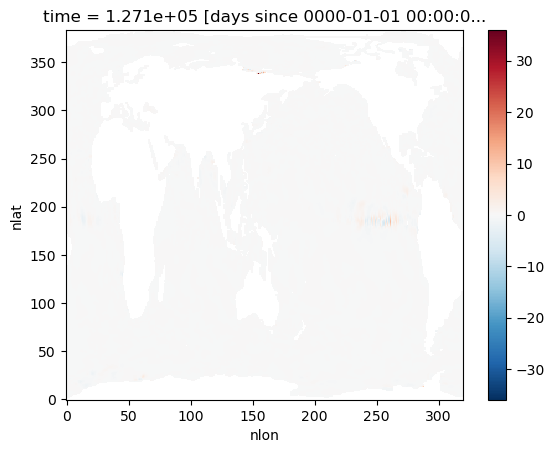

In [50]:
(ds[var_test].isel(time=12) - ds_ctrl[var_ctrl].isel(time=12)).plot() #(vmin=-1, vmax=1)

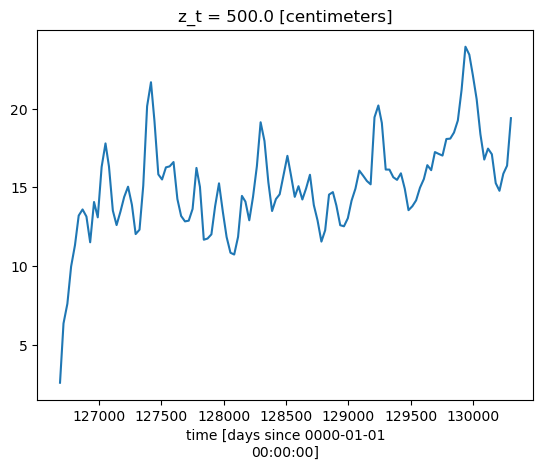

In [51]:
n = ds.KMT[0, :, :].where(ds.KMT[0, :, :] > 0).count().values.item()

np.sqrt(((ds[var_test] - ds_ctrl[var_ctrl]) ** 2) / n).sum(['nlat', 'nlon']).plot()

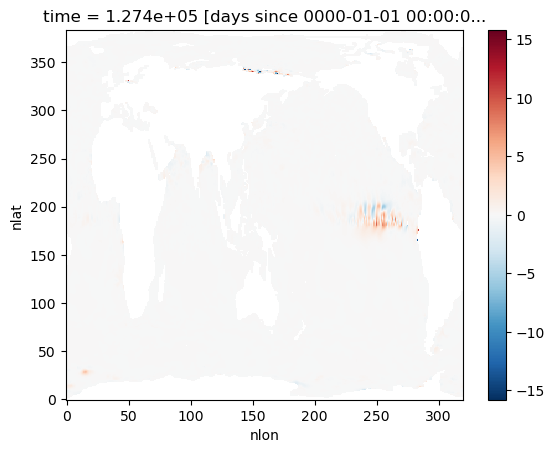

In [52]:
(ds[var_test] - ds_ctrl[var_ctrl]).isel(time=24).plot()